In [7]:
import zipfile
import os

zip_path = '/content/archive2.zip'
extracted_dir = '/content/dataset'
os.makedirs(extracted_dir, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

print(f"Dataset extracted to: {extracted_dir}")

Dataset extracted to: /content/dataset


In [8]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import random

data_dir = '/content/dataset'

mask_dir = os.path.join(data_dir, 'with_mask')
no_mask_dir = os.path.join(data_dir, 'without_mask')

mask_images = [os.path.join(mask_dir, f) for f in os.listdir(mask_dir) if os.path.isfile(os.path.join(mask_dir, f))]
no_mask_images = [os.path.join(no_mask_dir, f) for f in os.listdir(no_mask_dir) if os.path.isfile(os.path.join(no_mask_dir, f))]

all_images = mask_images + no_mask_images
labels = [1] * len(mask_images) + [0] * len(no_mask_images)

print(f"Number of images with mask: {len(mask_images)}")
print(f"Number of images without mask: {len(no_mask_images)}")
print(f"Total number of images: {len(all_images)}")

Number of images with mask: 1915
Number of images without mask: 1918
Total number of images: 3833


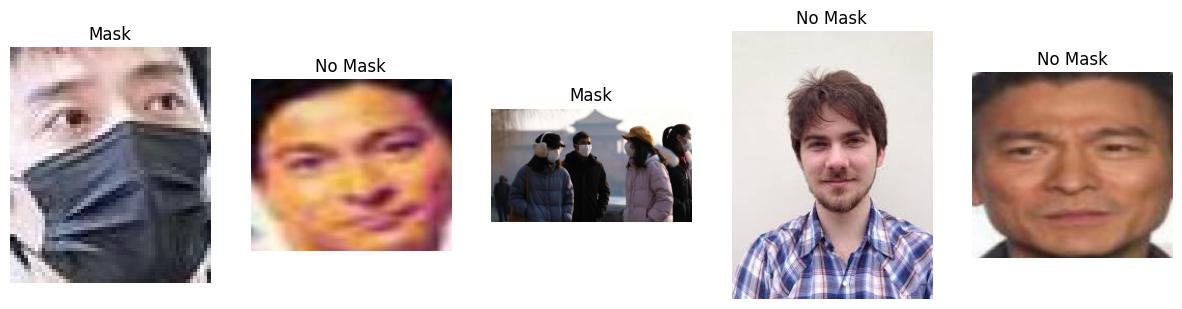

In [9]:
def display_random_images(image_paths, labels, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        index = random.randint(0, len(image_paths) - 1)
        plt.subplot(1, num_images, i + 1)
        img = Image.open(image_paths[index])
        plt.imshow(img)
        plt.title("Mask" if labels[index] == 1 else "No Mask")
        plt.axis('off')
    plt.show()

display_random_images(all_images, labels)

In [12]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


IMG_SIZE = 128
BATCH_SIZE = 32


train_images, test_images, train_labels, test_labels = train_test_split(
    all_images, labels, test_size=0.2, random_state=42, stratify=labels
)

train_labels_str = [str(label) for label in train_labels]
test_labels_str = [str(label) for label in test_labels]


train_df = pd.DataFrame({'filename': train_images, 'label': train_labels_str})
test_df = pd.DataFrame({'filename': test_images, 'label': test_labels_str})


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filename',
    y_col='label',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filename',
    y_col='label',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

Found 3066 validated image filenames belonging to 2 classes.
Found 767 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
40/95 ━━━━━━━━━━━━━━━━━━━━ 1:00 1s/step - accuracy: 0.6434 - loss: 0.6488

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


95/95 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.7236 - loss: 0.5455 - val_accuracy: 0.9334 - val_loss: 0.2098
Epoch 2/10
 1/95 ━━━━━━━━━━━━━━━━━━━━ 1:18 832ms/step - accuracy: 0.9688 - loss: 0.1992

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


95/95 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.9688 - loss: 0.1992 - val_accuracy: 0.9334 - val_loss: 0.2157
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.8782 - loss: 0.3115 - val_accuracy: 0.9429 - val_loss: 0.1914
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.8750 - loss: 0.2146 - val_accuracy: 0.9348 - val_loss: 0.2027
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.8869 - loss: 0.2903 - val_accuracy: 0.9592 - val_loss: 0.1587
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - accuracy: 0.9062 - loss: 0.2283 - val_accuracy: 0.9484 - val_loss: 0.1541
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.8890 - loss: 0.2820 - val_accuracy: 0.9443 - val_loss: 0.1543
Epoch 8/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.9062 - loss: 0.2723 - val_accuracy: 0.9470 - val_loss: 0.1593
Epoch 9/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.8928 - loss: 0.2599 - val_accuracy: 0.9538 - val_loss:

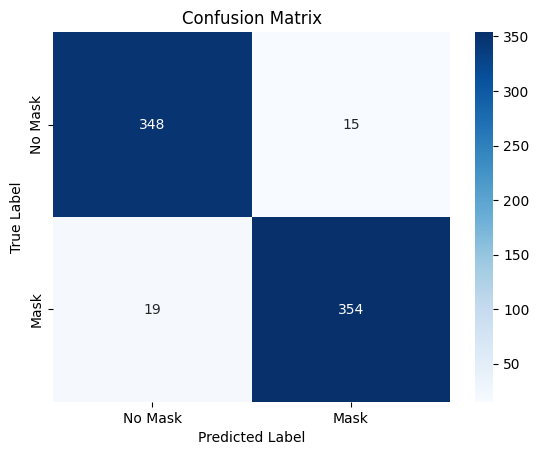

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

epochs = 10

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // BATCH_SIZE
)

loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // BATCH_SIZE)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(test_generator, steps=test_generator.samples // BATCH_SIZE)
y_pred_binary = (y_pred > 0.5).astype(int)
y_true = test_generator.labels[:len(y_pred_binary)]

print("Classification Report:")
print(classification_report(y_true, y_pred_binary, target_names=['No Mask', 'Mask']))

cm = confusion_matrix(y_true, y_pred_binary)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Mask', 'Mask'], yticklabels=['No Mask', 'Mask'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()